# Product Amount Forecast by Time

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

**Industrial Production: Manufacturing: Non-Durable Goods: Ice Cream and Frozen Dessert (NAICS = 31152)**<br>
**Endüstriyel Üretim: İmalat: Dayanıksız Mallar: Dondurma ve Dondurulmuş Tatlı**

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
# !pip install pyforest
# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

## Indest Data

In [3]:
df = pd.read_csv("Frozen_Dessert_Production.csv", parse_dates=['DATE'], index_col="DATE")

In [4]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
1972-06-01,100.596
1972-07-01,100.126
1972-08-01,96.361
1972-09-01,85.801


## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [5]:
df.head(14)

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
1972-06-01,100.596
1972-07-01,100.126
1972-08-01,96.361
1972-09-01,85.801


In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [7]:
df.columns = ['Production']

In [8]:
df.tail()

,Production
DATE,
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263
2019-08-01,102.609
2019-09-01,101.587


In [9]:
df.isnull().sum().any()                   # df.isnull().sum().sort_values(ascending=False)

False

In [10]:
df.nunique()

Production    573
dtype: int64

In [11]:
df.duplicated(subset=None, keep='first').sum()

0

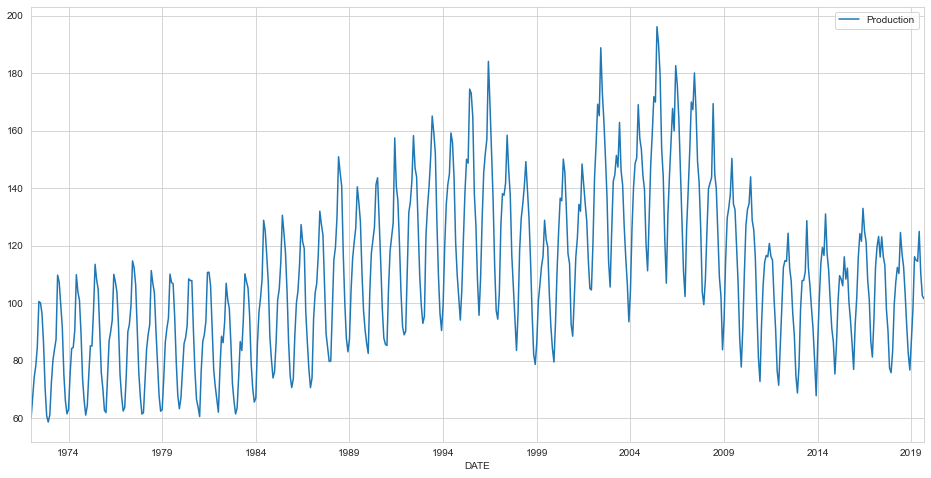

In [12]:
df.plot(figsize=(16,8));

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Production,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


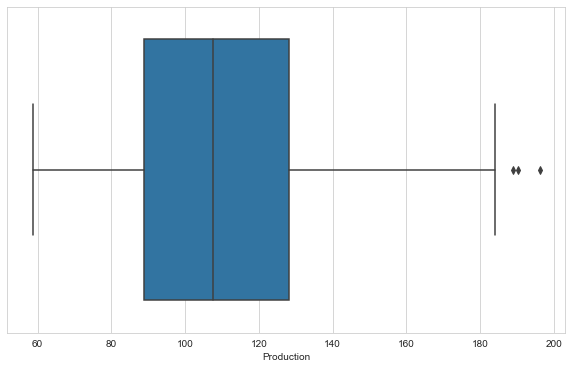

In [14]:
sns.boxplot(x= "Production", data=df);

## Preprocessing of Data

### Train Test Split

In [15]:
len(df)

573

In [16]:
test_size = 24    # 12 (ay) de bir tekrar ediyor data, o yüzden 12 den daha büyük seçmek gerek.

In [17]:
test_ind = len(df)- test_size
test_ind

549

In [18]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]
len(train), len(test)

(549, 24)

In [19]:
train.tail(12)

,Production
DATE,
2016-10-01,101.384
2016-11-01,86.665
2016-12-01,81.257
2017-01-01,94.245
2017-02-01,112.388
2017-03-01,119.698
2017-04-01,123.228
2017-05-01,116.064
2017-06-01,123.087


In [20]:
test.head(12)

,Production
DATE,
2017-10-01,90.473
2017-11-01,77.438
2017-12-01,75.812
2018-01-01,83.434
2018-02-01,99.490
2018-03-01,107.315
2018-04-01,112.431
2018-05-01,110.354
2018-06-01,124.584


### Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
length = 12      
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

# default stride 1 olduğu için 1 kaydırarak yapacak.

In [26]:
len(generator)

537

In [27]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [28]:
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


In [29]:
train_scaled[12]

array([0.01774221])

In [30]:
generator[1]

(array([[[0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ],
         [0.01774221]]]),
 array([[0.09850931]]))

In [31]:
train_scaled[13]

array([0.09850931])

## Modelling & Model Performance

### Import related libraries

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

### Creating Model

### with "tanh" activation function

In [33]:
n_features = 1  # feature sayımız bir, yani bir sütunumuz var.

In [34]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping and Validation Generator

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [38]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [39]:
len(validation_generator)

12

In [40]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 12s 16ms/step - loss: 0.0184 - val_loss: 0.0039
Epoch 2/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 3/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0045 - val_loss: 0.0020
Epoch 4/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 5/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 6/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 7/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 8/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 9/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0037 - val_loss: 0.0044
Epoch 10/20
537/537 [==============================] - 8s 15ms/step - loss: 0.0035 - val_l

In [41]:
model.history.history

{'loss': [0.018414361402392387,
  0.004991648253053427,
  0.004469269886612892,
  0.004290194250643253,
  0.004007813520729542,
  0.0034850286319851875,
  0.0035988539457321167,
  0.0033704706002026796,
  0.0036575905978679657,
  0.0035453245509415865,
  0.003459956729784608,
  0.003204772947356105,
  0.0029631394427269697,
  0.0030606526415795088,
  0.003014874644577503,
  0.002891338197514415,
  0.0027458886615931988,
  0.002720639342442155,
  0.0029319897294044495,
  0.0025636525824666023],
 'val_loss': [0.003930318169295788,
  0.0029771917033940554,
  0.0020224035251885653,
  0.0038499871734529734,
  0.0021266534458845854,
  0.002326114336028695,
  0.004305989481508732,
  0.0038848433177918196,
  0.0043596369214355946,
  0.0018554212292656302,
  0.0018399906111881137,
  0.0024483788292855024,
  0.001905254554003477,
  0.0026292477268725634,
  0.0024133881088346243,
  0.0024233018048107624,
  0.002101052552461624,
  0.0019051515264436603,
  0.002101833699271083,
  0.0022494464647024

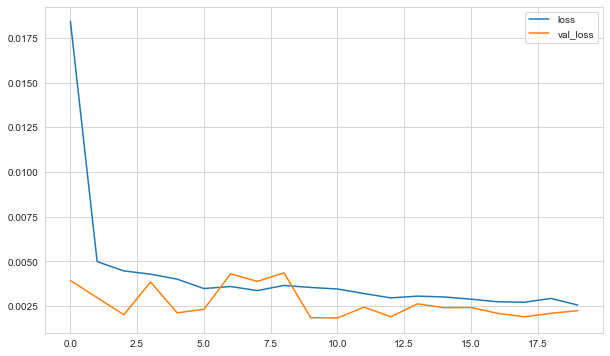

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

#### Evaluate on Test Data

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [45]:
# SADECE TEST VERİLERİ KULLANILARAK PREDICTION YAPMA:
y_pred = model.predict(validation_generator)  

In [46]:
y_pred

array([[0.26874578],
       [0.21853903],
       [0.19848973],
       [0.21534921],
       [0.31971496],
       [0.3681065 ],
       [0.4631659 ],
       [0.46229616],
       [0.45716482],
       [0.45959538],
       [0.35366553],
       [0.2770545 ]], dtype=float32)

In [47]:
test_scaled[-12:]   # test setindeki actual son 12 değer

array([[0.2434103 ],
       [0.17289089],
       [0.13163033],
       [0.20608099],
       [0.28689318],
       [0.41822681],
       [0.40948951],
       [0.40651527],
       [0.48213817],
       [0.37525952],
       [0.3195946 ],
       [0.31216335]])

In [48]:
# TEST SETİNİN ACTUAL SON 12 VERİSİYLE, İLK 12 VERİ KULLANILARAK TAHMİN EDİLEN DEĞERLERİ MUKAYESE ETME:
eval_metrics(test_scaled[-12:], y_pred)

r2_score: 0.794151113709032 
 mae: 0.04316663433761319 
 mse: 0.0022494467830570554 
 rmse: 0.047428333125433104


In [49]:
# FORECASTING:
# TRAIN SETİNİN SON ACTUAL VERİLERİNİ KULLANIP PREDICTION YAPMA VE TEST SETİNİN İLK ACTUAL VERİSİ İLE MUKAYESE ETME:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))    
# TRAIN SETİ SON VERİLERİYLE 12 AYLIK PREDICTION YAPMA:
for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)  # SONUÇ İKİ BOYUTLU
    
    # store prediction
    predictions_scaled.append(current_pred[0])   # TEK BOYUTA DÜŞÜRÜYORUZ
    
    # update batch to now include prediction and drop first value    # ÜÇ BOYUTA ÇIKARIYORUZ
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [50]:
predictions_scaled

[array([0.25467795], dtype=float32),
 array([0.27068844], dtype=float32),
 array([0.3151988], dtype=float32),
 array([0.38523743], dtype=float32),
 array([0.44513324], dtype=float32),
 array([0.48749352], dtype=float32),
 array([0.51374537], dtype=float32),
 array([0.5177519], dtype=float32),
 array([0.49559197], dtype=float32),
 array([0.44909844], dtype=float32),
 array([0.3931615], dtype=float32),
 array([0.34652308], dtype=float32)]

In [51]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: -0.15713693427348274 
 mae: 0.0967532642726011 
 mse: 0.01443023674209453 
 rmse: 0.12012592035899052


#### Inverse Transformations and Comparing

In [52]:
predictions = scaler.inverse_transform(predictions_scaled)

In [53]:
compare = test[:12]

In [54]:
compare['Predictions'] = predictions

In [55]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,93.682
2017-11-01,77.438,95.883
2017-12-01,75.812,102.004
2018-01-01,83.434,111.635
2018-02-01,99.490,119.872
2018-03-01,107.315,125.697
2018-04-01,112.431,129.307
2018-05-01,110.354,129.858
2018-06-01,124.584,126.811


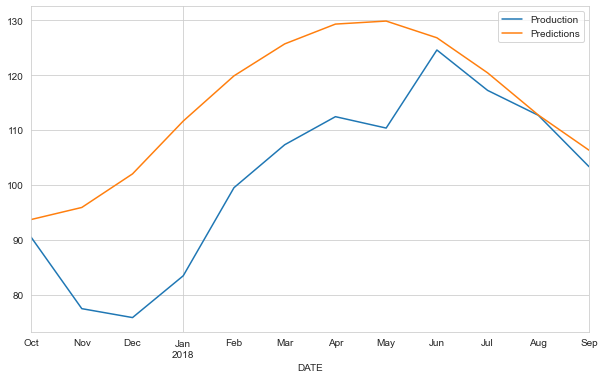

In [56]:
compare.plot();

#### Calculation R2 Score and Error Metrics

In [57]:
# SCALE'DEN ÇIKARDIĞIMIZ İÇİN GERÇEK RAKAMLARLA DEĞERLENDİRME YAPABİLİRİZ.
eval_metrics(compare.Production, compare.Predictions)
# scale edilmemis prediction ile de yukaridaki ayni skoru aldik (r2 0.667)

r2_score: -0.15713693427348185 
 mae: 13.304918707856032 
 mse: 272.8768257732373 
 rmse: 16.51898379965418


### with "relu" activation function

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [59]:
n_features = train_scaled.shape[1] 

In [60]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [64]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = 1)

In [65]:
len(validation_generator)

12

In [66]:
model.fit_generator(generator, epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20
537/537 [==============================] - 8s 12ms/step - loss: 0.0307 - val_loss: 0.0157
Epoch 2/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0199 - val_loss: 0.0024
Epoch 3/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0100 - val_loss: 0.0057
Epoch 4/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0083 - val_loss: 0.0024
Epoch 5/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0071 - val_loss: 0.0020
Epoch 6/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0061 - val_loss: 0.0022
Epoch 7/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 8/20
537/537 [==============================] - 6s 12ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 9/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0049 - val_loss: 0.0021
Epoch 10/20
537/537 [==============================] - 6s 11ms/step - loss: 0.0041 - val_lo

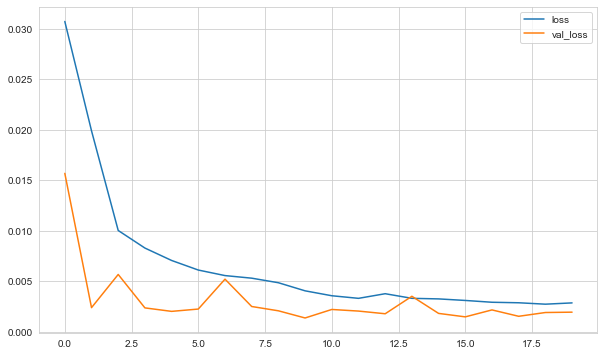

In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

#### Evaluate on Test Data

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [70]:
y_pred = model.predict(validation_generator)

In [71]:
y_pred

array([[0.25094405],
       [0.18216272],
       [0.15450124],
       [0.19550374],
       [0.2940501 ],
       [0.37084892],
       [0.44192988],
       [0.48446465],
       [0.49077928],
       [0.46687597],
       [0.3848553 ],
       [0.29296976]], dtype=float32)

In [72]:
test_scaled[-12:]

array([[0.2434103 ],
       [0.17289089],
       [0.13163033],
       [0.20608099],
       [0.28689318],
       [0.41822681],
       [0.40948951],
       [0.40651527],
       [0.48213817],
       [0.37525952],
       [0.3195946 ],
       [0.31216335]])

In [73]:
eval_metrics(test_scaled[-12:], y_pred)

r2_score: 0.8223343070792639 
 mae: 0.0333241776595889 
 mse: 0.0019414704087115963 
 rmse: 0.044062119884449455


In [74]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))    
# TRAIN SETİ SON VERİLERİYLE 12 AYLIK PREDICTION YAPMA:
for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)  # SONUÇ İKİ BOYUTLU
    
    # store prediction
    predictions_scaled.append(current_pred[0])   # TEK BOYUTA DÜŞÜRÜYORUZ
    
    # update batch to now include prediction and drop first value    # ÜÇ BOYUTA ÇIKARIYORUZ
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [75]:
predictions_scaled

[array([0.26440254], dtype=float32),
 array([0.21020369], dtype=float32),
 array([0.21255036], dtype=float32),
 array([0.29816917], dtype=float32),
 array([0.3871471], dtype=float32),
 array([0.45710713], dtype=float32),
 array([0.5062533], dtype=float32),
 array([0.5375396], dtype=float32),
 array([0.5449818], dtype=float32),
 array([0.5016061], dtype=float32),
 array([0.43493885], dtype=float32),
 array([0.35480553], dtype=float32)]

In [76]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.33790184087624675 
 mae: 0.0830368919217494 
 mse: 0.00825678698836057 
 rmse: 0.09086686408345218


**SONUC : TANH ile tahmin iyi bir şeçim değildi.(Bu data için)**

#### Inverse Transformations and Comparing

In [77]:
predictions = scaler.inverse_transform(predictions_scaled)

In [78]:
compare = test[:12]

In [79]:
compare['Predictions'] = predictions

In [80]:
compare

,Production,Predictions
DATE,,
2017-10-01,90.473,95.019
2017-11-01,77.438,87.566
2017-12-01,75.812,87.888
2018-01-01,83.434,99.662
2018-02-01,99.490,111.898
2018-03-01,107.315,121.518
2018-04-01,112.431,128.277
2018-05-01,110.354,132.579
2018-06-01,124.584,133.602


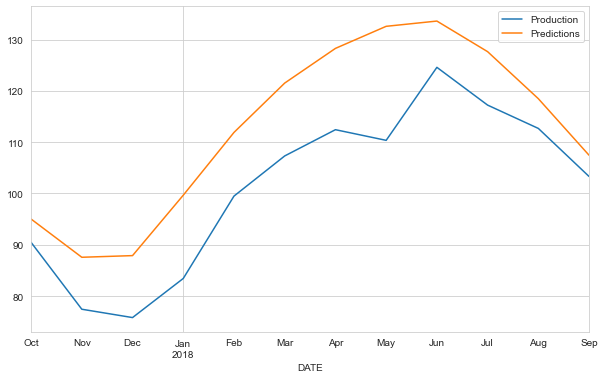

In [81]:
compare.plot();

#### Calculation R2 Score and Error Metrics

In [82]:
# SCALE'DEN ÇIKARDIĞIMIZ İÇİN GERÇEK RAKAMLARLA DEĞERLENDİRME YAPABİLİRİZ.
eval_metrics(compare.Production, compare.Predictions)

r2_score: 0.33790184087624775 
 mae: 11.418726852038247 
 mse: 156.1364421622487 
 rmse: 12.495456860885428


## Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [83]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [84]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [85]:
len(df)

573

In [86]:
len(generator)

561

In [87]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs=20)

Epoch 1/20
561/561 [==============================] - 8s 11ms/step - loss: 0.0255
Epoch 2/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0098
Epoch 3/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0072
Epoch 4/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0072
Epoch 5/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0057
Epoch 6/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0049
Epoch 7/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0042
Epoch 8/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0038
Epoch 9/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0032
Epoch 10/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0032
Epoch 11/20
561/561 [==============================] - 7s 12ms/step - loss: 0.0029
Epoch 12/20
561/561 [==============================] - 6s 11ms/step - loss: 0.0033
Epoch 13/20
5

In [88]:
scaled_full_data.shape

(573, 1)

In [89]:
scaled_full_data[-length:].shape

(12, 1)

In [90]:
forecast = []
# Replace periods with whatever forecast length you want

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)
    
# Burada tüm datamızın sonundan 12lik bir parçayı aldık. bu bizim ilk eval_batch imiz olacak. 
# sonra bunu reshape yaptık (1,12,1) oldu  ( (1, length, n_features) )
# bundan for döngüsü içinde current_batch i hep bir ilerletecek şekilde predict ler alıp alıp forecast e kaydettim.

In [91]:
forecast = scaler.inverse_transform(forecast)

In [92]:
forecast

array([[ 89.0885614 ],
       [ 82.58086975],
       [ 81.84886785],
       [ 90.83528388],
       [102.66535354],
       [112.43334574],
       [118.73187995],
       [123.5197069 ],
       [126.93768289],
       [122.17097003],
       [113.47508393],
       [103.00504792]])

In [93]:
df

,Production
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
1972-06-01,100.596
1972-07-01,100.126
1972-08-01,96.361
1972-09-01,85.801


In [94]:
#  2019-10-01 den sonra period kadar yukarıda belirtildi (12 tane), ve frekans aralığında (MS months yani aylar halinde) indexler oluştur.
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS') # arange in date için yapılanıreq = 'MS')

In [95]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [96]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

# forecast lerden dataframe oluşturduk

In [97]:
forecast_df

,Forecast
2019-10-01,89.089
2019-11-01,82.581
2019-12-01,81.849
2020-01-01,90.835
2020-02-01,102.665
2020-03-01,112.433
2020-04-01,118.732
2020-05-01,123.520
2020-06-01,126.938
2020-07-01,122.171


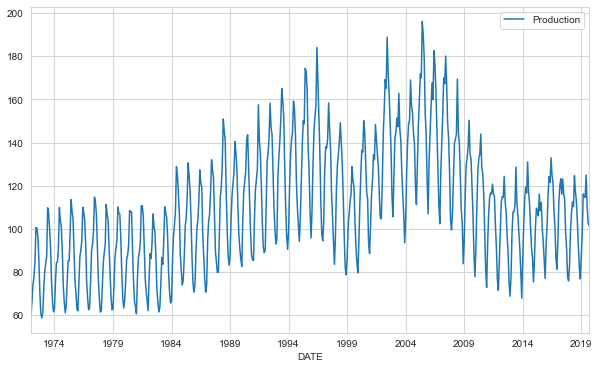

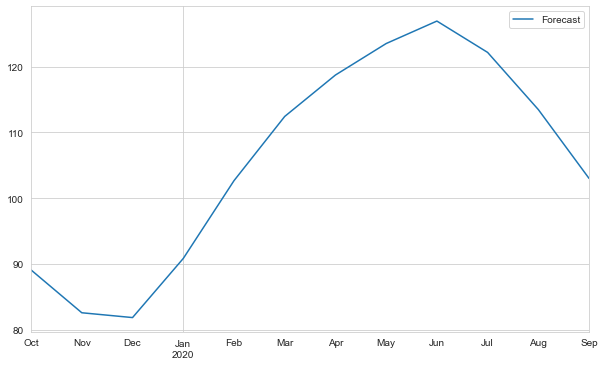

In [98]:
df.plot()
forecast_df.plot();

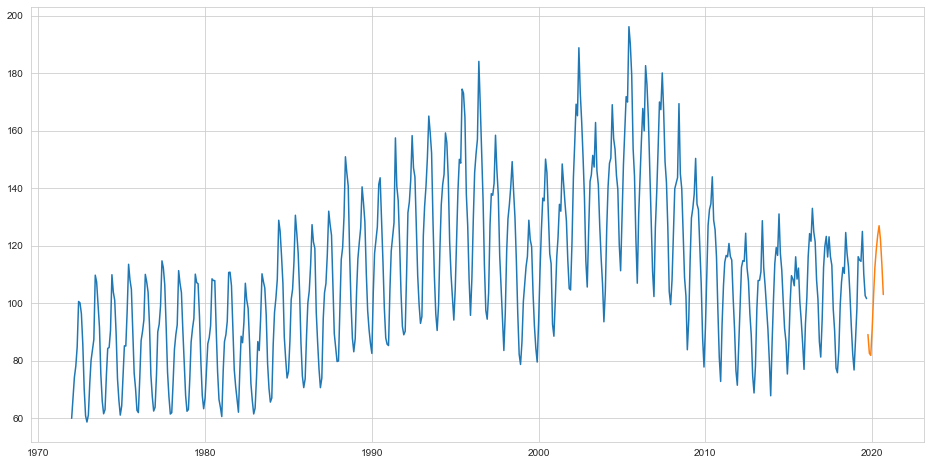

In [99]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])
#plt.plot(forecast_index, forecast)

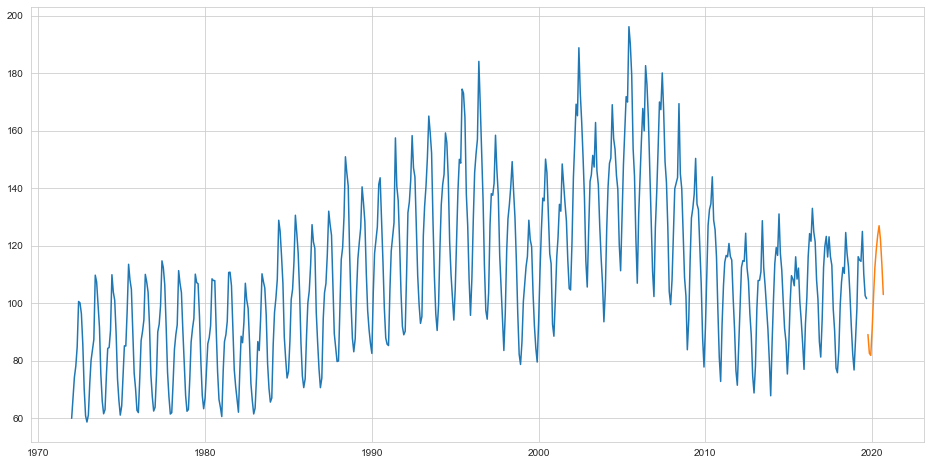

In [100]:
# arka arkaya çıkması için 1.yol
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])
# plt.plot(forecast_index, forecast)

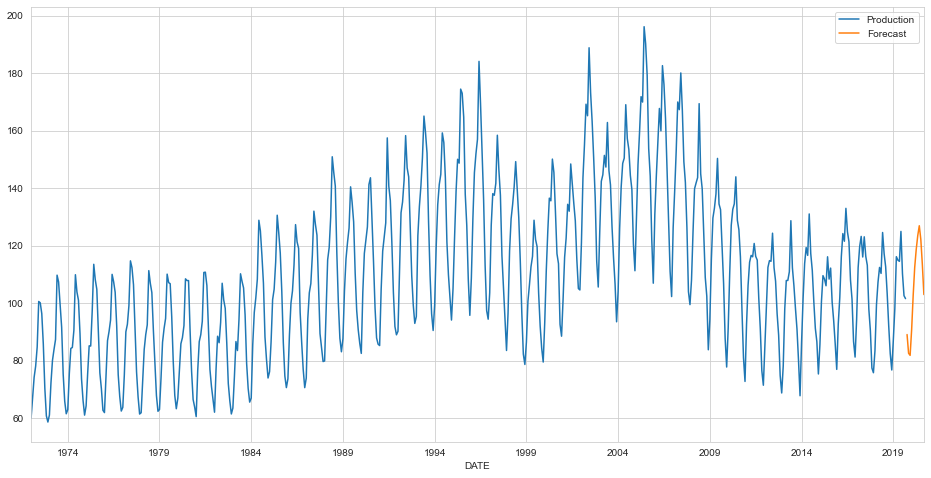

In [101]:
# arka arkaya çıkması için 2. yol.
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));


(576.0, 611.0)

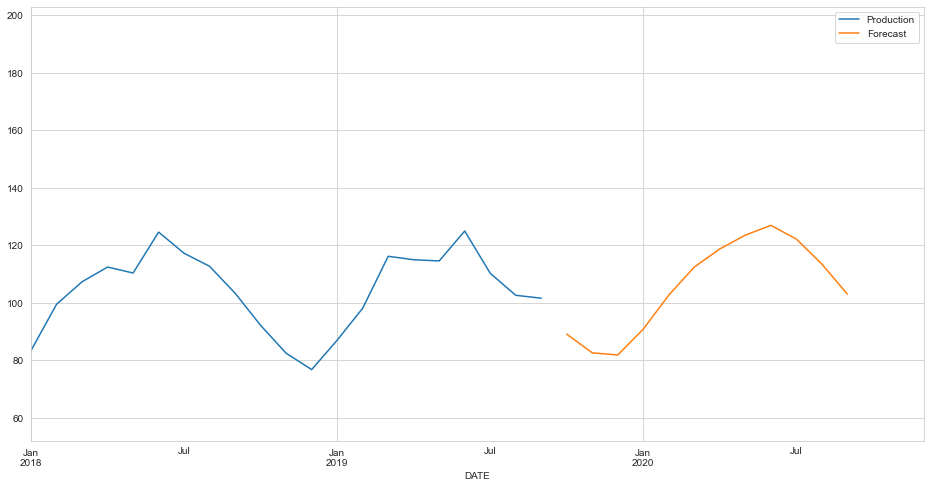

In [102]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')